In [11]:
%reset -f
%load_ext autoreload
%autoreload 2
from mechanics import LagrangeSystem, S

system = (
    LagrangeSystem()
    .add_coordinate(r'\theta', space=S)
    .add_constant('m g l')
    .define('x y', 'l * sin(theta), - l * cos(theta)')
    .define('T', 'm/2 * (dot(x)**2 + dot(y)**2)')
    .define('U', 'm * g * y')
    .define('L', 'T - U')
    .define('E', 'T + U')
    .euler_lagrange_equation('L')
)
system.show_all()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [12]:
from mechanics.integrator import RK4
system_d = (
    system.discretization()
    .add_constant('N h')
    .uniform_space('t', 'i', 0, 'N', 'h')
    .apply(RK4('h'))
    .doit()
)
system_d.show_all()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Unknowns: [T(i,), {k_{3\dot{\theta}}}(i,), {k_{4\dot{\theta}}}(i,), {k_{1\ddot{\theta}}}(i,), \dot{\theta}(i + 1,), {k_{1\dot{\theta}}}(i,), y(i,), {k_{2\ddot{\theta}}}(i,), {k_{4\ddot{\theta}}}(i,), \theta(i + 1,), t(i,), {k_{2\dot{\theta}}}(i,), x(i,), E(i,), {k_{3\ddot{\theta}}}(i,), U(i,), L(i,)]
Variables: (\theta(i,), \dot{\theta}(i,), \ddot{\theta}(i,), {k_{1\dot{\theta}}}(i,), {k_{2\dot{\theta}}}(i,), {k_{3\dot{\theta}}}(i,), {k_{4\dot{\theta}}}(i,), {k_{1\ddot{\theta}}}(i,), {k_{2\ddot{\theta}}}(i,), {k_{3\ddot{\theta}}}(i,), {k_{4\ddot{\theta}}}(i,), t(i,), x(i,), y(i,), T(i,), U(i,), L(i,), E(i,))
[(i,), (i,), (i,), (i,), (i,), (i,), (i,), (i,), (i,), (i,), (i,), (i,), (i,), (i,), (i,), (i,), (i,)]
def equations_generated(N, h, m, g, l, i, theta, dottheta, ddottheta, k_1dottheta, k_2dottheta, k_3dottheta, k_4dottheta, k_1ddottheta, k_2ddottheta, k_3ddottheta, k_4ddottheta, t, x, y, T, U, L, E, _):
  _[0] = -i*h + t[i]
  _[1] = -l*numpy.sin(theta[i]) + x[i]
  _[2] = l*numpy.c

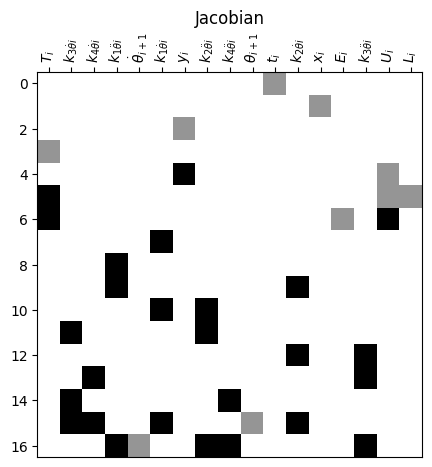

In [26]:
solver = system_d.solver()
solver.plot_jacobian()

In [28]:
import numpy as np
result = solver.run({
    'l': 1,
    'm': 1,
    'g': 1,
    'N': 10,
    'h': 0.1,
    'theta': np.pi/4,
    'dottheta': 0,
})
# result.newton_converged_iters

i = 0, ..., 10


100%|██████████| 11/11 [00:00<00:00, 315.65it/s]

vars 0 [ 7.85398163e-01  0.00000000e+00  4.58934309e-07 -9.64582525e-07
  9.78673212e-07 -9.91553358e-07  1.65333400e-06  7.03127832e-07
  1.49800464e-07  2.13638658e-08 -2.75253615e-07  1.53525248e-07
 -1.64217566e-07  1.33341800e-06 -5.40957253e-07  4.80669655e-07
 -1.78366475e-06 -1.30978466e-06]
vars 1 [ 7.85397059e-01 -8.12338392e-07  1.97175561e-06 -5.77949071e-07
  1.32411338e-06 -1.49902273e-06  9.83428514e-07  9.50945270e-07
 -2.07194479e-07 -2.28491921e-06 -1.20195871e-07  2.58162199e-07
  8.28637070e-07  9.41273630e-07  1.59322073e-06 -2.07107637e-06
 -7.60928757e-07 -1.00816757e-06]
equations [ 1.53525248e-07 -7.07106945e-01  7.07108115e-01 -5.40957253e-07
 -8.52748348e-07 -7.62037841e-07 -1.24949706e-06  9.64582525e-07
 -7.07107484e-01 -9.43516820e-07 -7.07106897e-01  9.99043381e-07
 -7.07106837e-01 -1.65119762e-06 -7.07106436e-01 -1.11575593e-06
 -8.25175107e-07]
jacobian [[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.      

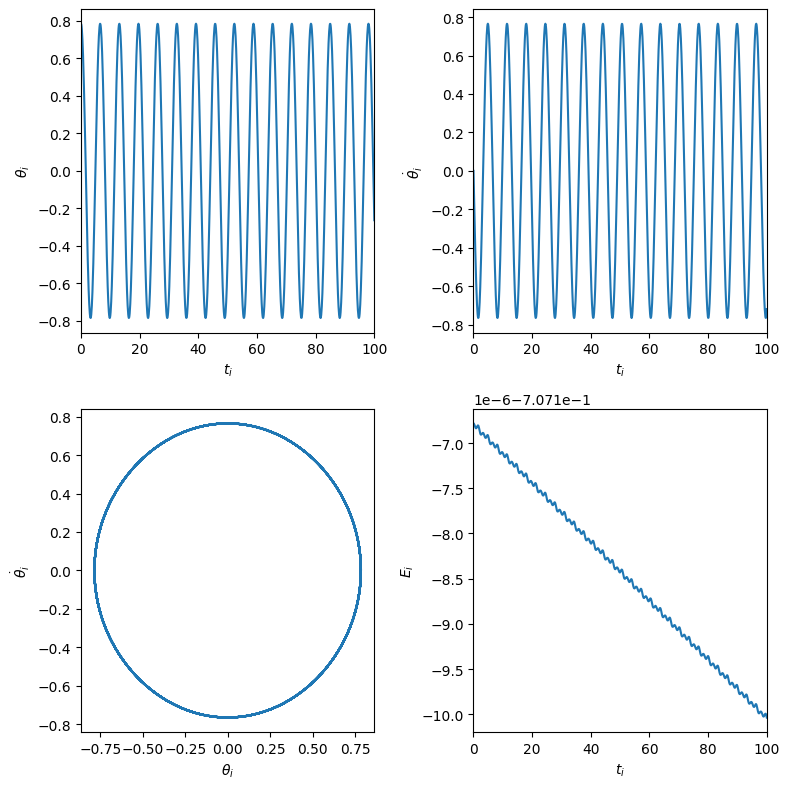

In [25]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(8, 8), layout='tight', subplot_kw={'projection': result})
axes = axes.flatten()

axes[0].plot('theta')
axes[1].plot('dottheta')
axes[2].plot('theta', 'dottheta')
axes[3].plot('E')